In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('advertising.csv')

In [5]:
print(df.head())
print(df.describe())
print("\nCorrelation Matrix:\n", df.corr())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Correlation Matrix:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


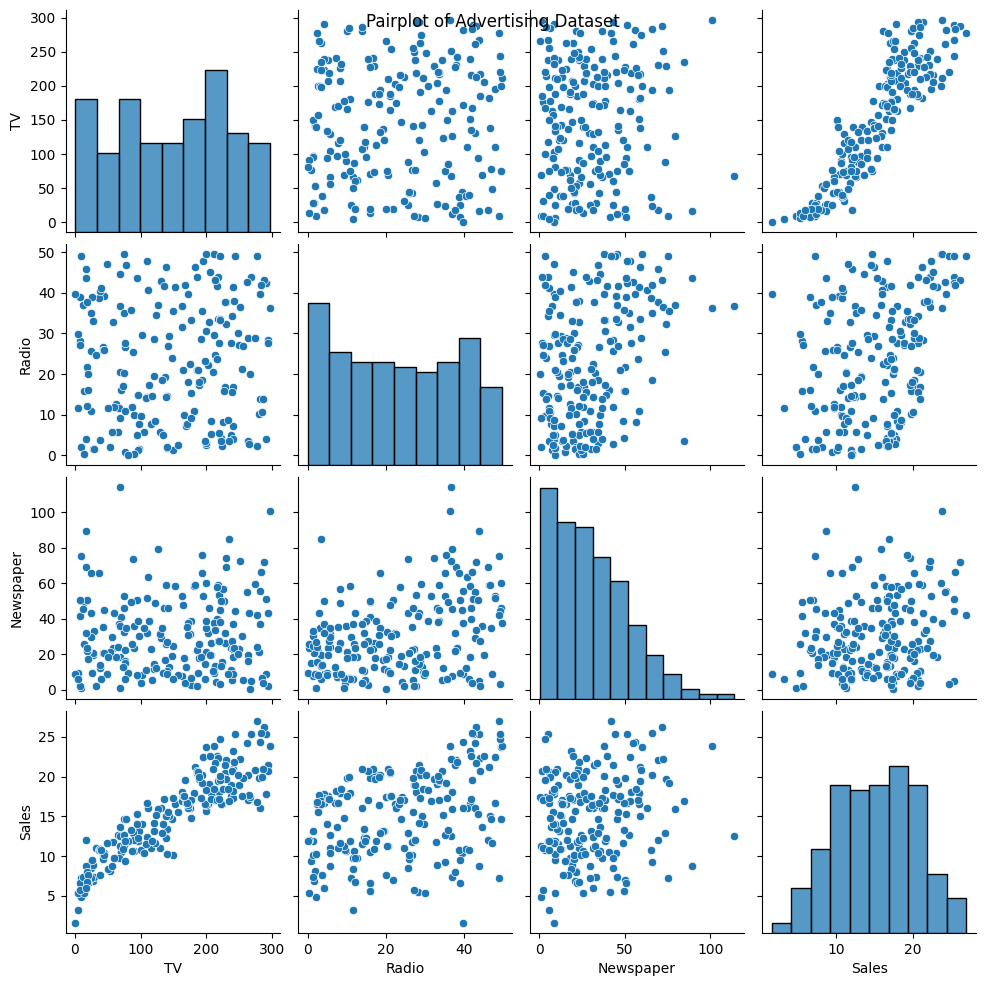

In [6]:
sns.pairplot(df, diag_kind='hist')
plt.suptitle('Pairplot of Advertising Dataset')
plt.show()

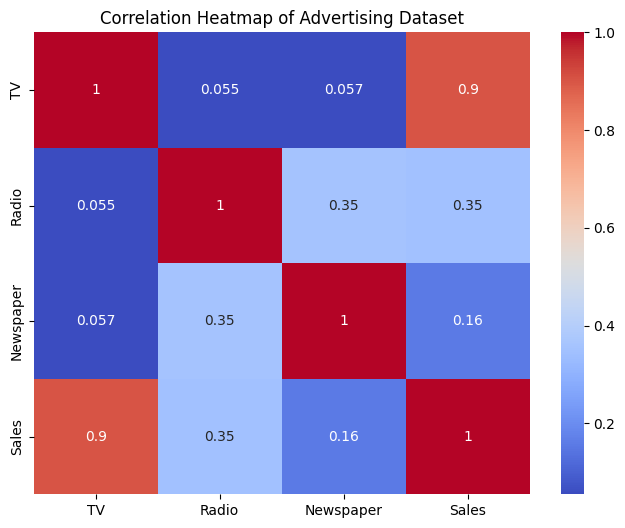

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Advertising Dataset')
plt.show() 

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print('\nModel Coefficients:')
print(f'TV: {model.coef_[0]:.4f}, Radio: {model.coef_[1]:.4f}, Newspaper: {model.coef_[2]:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Intercept: {model.intercept_:.4f}')


Model Coefficients:
TV: 0.0545, Radio: 0.1009, Newspaper: 0.0043
Mean Squared Error: 2.9078
R^2 Score: 0.9059
Intercept: 4.7141


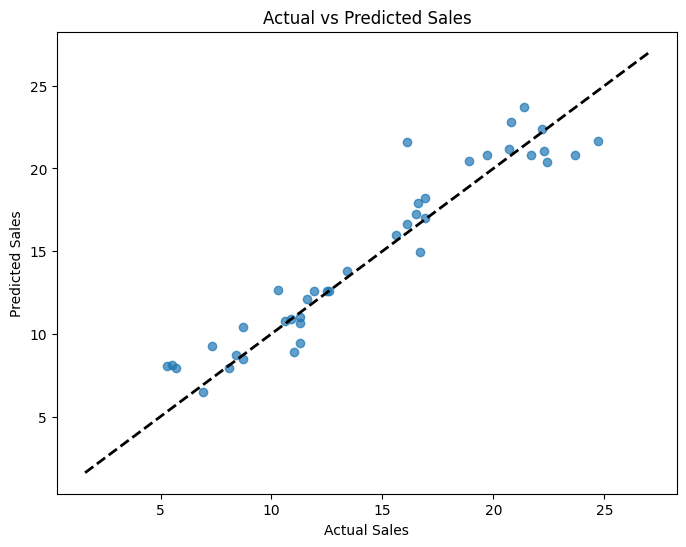

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()